# Model Performance

In the previous section I explored the effectiveness of using various combinations of features with initial versions of SVM and TensorFlow models. In this section I will take the best-performing models from this investigation, tune them to see if they could improved further and evaluate their performance and generalization ability. 

The models are SVM_BOW_OF (Support Vector Machines using bag-of-words and non-speech features) and TF_OF (TensorFlow ANN using non-speech features only). Both of these models achieved over 82% accuracy in the initial investigation, which was a clear improvement over the naïve majority classifier (approx. 73% accuracy).

## 1. Importing Data 

### 1.1. Importing CSV file of the data used during model development

In [1]:
import pandas as pd
import numpy as np

In [2]:
# this imports only the required data
col_names = ['Vote', 'Constituency', 'Party', 'Bill_Type', 'Utterance_Count', 'Stemmed_Utterance', 'Sentiment_Polarity','Sentiment_Subjectivity', 'Word_Count', 'Is_Government']
data = pd.read_csv('dail_vote_features.csv', usecols=col_names, index_col=False, warn_bad_lines=True, error_bad_lines=False)
# This starts the dataframe index at 1
data.index = data.index + 1

In [9]:
data.shape

(437, 10)

In [10]:
data.head(5)

,Vote,Constituency,Party,Bill_Type,Utterance_Count,Stemmed_Utterance,Sentiment_Polarity,Sentiment_Subjectivity,Word_Count,Is_Government
1,1,Louth,Fianna_Fáil,Private Member,3,must deal postpon divis relat second stage ren...,0.175000,0.225000,57,0.0
2,1,Dublin-Mid-West,Sinn_Féin,Private Member,27,move bill read second time everybodi chamber k...,0.104221,0.366668,1127,0.0
3,1,Dublin-Bay-North,Sinn_Féin,Private Member,2,rent state high continu rise time freez rent p...,0.093730,0.362619,122,0.0
4,1,Cork-South-Central,Sinn_Féin,Private Member,4,rent economi societi extrem hard even one dece...,0.015449,0.485192,222,0.0
5,1,Waterford,Sinn_Féin,Private Member,4,said last week peopl outsid hous sick tire pol...,-0.008743,0.361981,227,0.0


### 1.2. Create bag-of-words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# this transforms the words in the Stemmed_Utterance column into binary vectors
utterance = data['Stemmed_Utterance']

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(utterance)
# encode document
vector = vectorizer.transform(utterance)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(437, 9654)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 1.3. Create feature sets required for the models

In [73]:
# Bag-of-Words only
X_BOW = vector.toarray()
print(X_BOW)
print()

# Other features only
X_OF = pd.get_dummies(other_filtered).values
print(X_OF)
print()

# Bag-of-Words and non-speech features 
X_BOW_OF =  np.append(X_BOW, X_OF, axis=1)
print(X_BOW_OF)
print()
# class variable
y = data['Vote'].values
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1

## 2. Refining the SVM Model

In [6]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The best performing SVM model from the previous step was the SVM_BOW_OF model which which was trained on bag-of-words together with other (non-speech) features, which achieved accuracy of 82.57%, precision of 87.5%, recall of 90.1% and F1 score of 0.89. This model used the linear kernel. I decided to further refine the model by trying the parameters suggested in the literature to see if they would improve the metrics further.

### 2.1. Model SVM_A

For this model I used L2 regularization and square hinge loss which were used by Abercrombie & Batista-Navarro (2020, p. 5076) for their dataset, both of which are the default settings in the LinearSVC module.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_BOW_OF, y, test_size=0.3) # 70% training and 30% test

In [58]:
from sklearn.svm import LinearSVC

#Create a svm Classifier
SVM_X_BOW_OF = svm.LinearSVC() 

#Train the model using the training sets
SVM_X_BOW_OF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_X_BOW_OF.predict(X_test)

In [59]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix) 
print()
# overall metrics
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[90  6]
 [17 19]]

Classification report: 
               precision    recall  f1-score   support

           1       0.84      0.94      0.89        96
           0       0.76      0.53      0.62        36

    accuracy                           0.83       132
   macro avg       0.80      0.73      0.75       132
weighted avg       0.82      0.83      0.81       132


Overall Metrics: 

Accuracy: 0.8257575757575758
Precision: 0.8411214953271028
Recall: 0.9375
F1 Score: 0.8866995073891626


This model achieved similar results to the SVM_X_BOW_OF. While its precision was slightly lower, it achieved better recall.

### 2.2. Model SVM_B

In this model, the kernel was changed from "linear" to "rbf", which was used by Budhwar (2018, p. 23) for his dataset.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_BOW_OF, y, test_size=0.3) # 70% training and 30% test

In [61]:
#Create a svm Classifier
SVM_X_BOW_OF = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
SVM_X_BOW_OF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_X_BOW_OF.predict(X_test)

In [62]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Confusion matrix: \n',matrix)
print()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, zero_division=0, labels=[1,0])
print('Classification report: \n',matrix) 
print()
# overall metrics
print('Overall Metrics: \n')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion matrix: 
 [[96  3]
 [22 11]]

Classification report: 
               precision    recall  f1-score   support

           1       0.81      0.97      0.88        99
           0       0.79      0.33      0.47        33

    accuracy                           0.81       132
   macro avg       0.80      0.65      0.68       132
weighted avg       0.81      0.81      0.78       132


Overall Metrics: 

Accuracy: 0.8106060606060606
Precision: 0.8135593220338984
Recall: 0.9696969696969697
F1 Score: 0.8847926267281105


This model had lower accuracy and precision scores than the original model and model A. Its F1 score was in line with the other two models (although slightly lower), but it also achieved the best recall for the "Yes" votes. As the original model (SVM_BOW_OF) had better metrics, I chose to proceed with that model.

###  SVM Model Comparison Table

| Metric/Algorithm | NAIVE | SVM_BOW_OF | SVM_A | SVM_B|
| :-:| --- | --- | --- | --- |
|  accuracy | 0.7368 | <b> 0.8258</b> | <b>0.8258</b> | 0.8106
|  precision | 0.7368  | <b>0.875</b> | 0.8411 |0.8136|
|  recall |  1 | 0.901 | 0.9375 |<b>0.9697</b>|
|  specificity |  0 | <b>0.58</b>| 0.53 |0.33|
|  F1 | 0.8484 | <b>0.8878</b> | 0.8868 |0.8848|


   

### 2.3. k-Fold Cross-Validation of Model SVM_BOW_OF

A commonly used method for evaluating the performance of an SVM model is using k-fold cross-validation. This technique divides the dataset into k number of partitions, and trains the model k times using k-1 partitions each time, holding out each partition as a validation set in turn. 

A model that generalizes well should have relatively stable performance across each of these trials. This can be evaluated by looking at the mean and standard deviation of the performance metrics. 

I decided to use both k-fold and stratified k-fold (which is sometimes recommended for datasets which have a class imbalance as mentioned in the scikit learn documentation on cross-validation).

#### 2.3.1. k-Fold 

First I ran regular k-fold cross validation using 10 folds. 

In [152]:
from sklearn.model_selection import KFold

accuracy = []
precision = []
recall = []
f1scores = []

f=1

kf = KFold(n_splits=10)
for train, test in kf.split(X_BOW_OF):
    X_train, X_test, y_train, y_test = X_BOW_OF[train], X_BOW_OF[test], y[train], y[test]
   #Create a svm Classifier
    SVM_X_BOW_OF = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    SVM_X_BOW_OF.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = SVM_X_BOW_OF.predict(X_test)
    
    # overall metrics
    print('Fold', f, '\n')

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    print("Precision:",metrics.precision_score(y_test, y_pred))

    print("Recall:",metrics.recall_score(y_test, y_pred))

    print("F1 Score:",metrics.f1_score(y_test, y_pred))

    print()
    
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    precision.append(metrics.precision_score(y_test, y_pred))
    recall.append(metrics.recall_score(y_test, y_pred))
    f1scores.append(metrics.f1_score(y_test, y_pred))
    f = f+1
        


print("%0.2f mean accuracy with a standard deviation of %0.2f" % (np.array(accuracy).mean(), np.array(accuracy).std()))
print("%0.2f mean precision with a standard deviation of %0.2f" % (np.array(precision).mean(), np.array(precision).std()))
print("%0.2f mean recall with a standard deviation of %0.2f" % (np.array(recall).mean(), np.array(recall).std()))
print("%0.2f mean F1 score with a standard deviation of %0.2f" % (np.array(f1scores).mean(), np.array(f1scores).std()))


Fold 1 

Accuracy: 0.7954545454545454
Precision: 0.875
Recall: 0.8974358974358975
F1 Score: 0.8860759493670887

Fold 2 

Accuracy: 0.7954545454545454
Precision: 0.9285714285714286
Recall: 0.7878787878787878
F1 Score: 0.8524590163934426

Fold 3 

Accuracy: 0.7727272727272727
Precision: 0.8108108108108109
Recall: 0.9090909090909091
F1 Score: 0.8571428571428571

Fold 4 

Accuracy: 0.8181818181818182
Precision: 0.8461538461538461
Recall: 0.9428571428571428
F1 Score: 0.8918918918918919

Fold 5 

Accuracy: 0.8409090909090909
Precision: 0.9393939393939394
Recall: 0.8611111111111112
F1 Score: 0.8985507246376813

Fold 6 

Accuracy: 0.6136363636363636
Precision: 0.5357142857142857
Recall: 0.7894736842105263
F1 Score: 0.6382978723404255

Fold 7 

Accuracy: 0.75
Precision: 0.9310344827586207
Recall: 0.75
F1 Score: 0.8307692307692308

Fold 8 

Accuracy: 0.7674418604651163
Precision: 0.9333333333333333
Recall: 0.7777777777777778
F1 Score: 0.8484848484848485

Fold 9 

Accuracy: 0.813953488372093
Prec

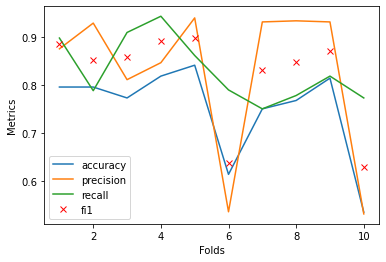

In [168]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.7954545454545454, 0.7954545454545454, 0.7727272727272727, 0.8181818181818182, 0.8409090909090909,0.6136363636363636,0.75,0.7674418604651163,0.813953488372093, 0.5348837209302325], label='accuracy')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.875, 0.9285714285714286, 0.8108108108108109,0.8461538461538461, 0.9393939393939394,0.5357142857142857, 0.9310344827586207, 0.9333333333333333, 0.9310344827586207, 0.53125] , label='precision')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.8974358974358975, 0.7878787878787878, 0.9090909090909091,0.9428571428571428,0.8611111111111112,0.7894736842105263, 0.75, 0.7777777777777778, 0.8181818181818182, 0.7727272727272727], label='recall')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.8860759493670887, 0.8524590163934426, 0.8571428571428571,0.8918918918918919,0.8985507246376813,0.6382978723404255, 0.8307692307692308, 0.8484848484848485, 0.8709677419354839, 0.6296296296296297], 'rx', label='fi1')        
plt.xlabel("Folds")
plt.ylabel("Metrics")
plt.legend()

This has relatively high scores for precision, recall and F1, with relatively low standard deviation. Mean accuracy is a little lower but is still higher than the naïve  majority class classifier. Overall, this result suggests the model generalizes well.

I also visualized the k-fold splits.

In [102]:
from matplotlib.patches import Patch
cmap_cv = plt.cm.coolwarm


<AxesSubplot:title={'center':'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

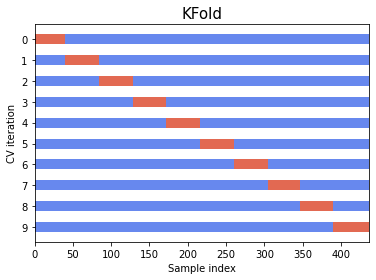

In [153]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Formatting
    yticklabels = list(range(n_splits)) 
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2], xlim=[0, 437])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_cv_indices(kf, X_BOW_OF, y, ax, 10)

Next, I used the stratified k-fold variation to see how it would impact the results. Stratified k-fold attempts to balance the number of samples in each class in each partition. This can be useful for imbalanced datasets. My dataset is somewhat imbalanced, though not extremely so.

In [154]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_BOW_OF, y)

accuracy = []
precision = []
recall = []
f1scores = []

f=1


for train_index, test_index in skf.split(X_BOW_OF, y):
    X_train, X_test = X_BOW_OF[train_index], X_BOW_OF[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Create a svm Classifier
    SVM_X_BOW_OF = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    SVM_X_BOW_OF.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = SVM_X_BOW_OF.predict(X_test)
    
    # overall metrics
    print('Fold', f, '\n')

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    print("Precision:",metrics.precision_score(y_test, y_pred))

    print("Recall:",metrics.recall_score(y_test, y_pred))

    print("F1 Score:",metrics.f1_score(y_test, y_pred))
    
    print()
    
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    precision.append(metrics.precision_score(y_test, y_pred))
    recall.append(metrics.recall_score(y_test, y_pred))
    f1scores.append(metrics.f1_score(y_test, y_pred))
    f = f+1

print("%0.2f mean accuracy with a standard deviation of %0.2f" % (np.array(accuracy).mean(), np.array(accuracy).std()))
print("%0.2f mean precision with a standard deviation of %0.2f" % (np.array(precision).mean(), np.array(precision).std()))
print("%0.2f mean recall with a standard deviation of %0.2f" % (np.array(recall).mean(), np.array(recall).std()))
print("%0.2f mean F1 score with a standard deviation of %0.2f" % (np.array(f1scores).mean(), np.array(f1scores).std()))

Fold 1 

Accuracy: 0.7727272727272727
Precision: 0.7804878048780488
Recall: 0.9696969696969697
F1 Score: 0.8648648648648648

Fold 2 

Accuracy: 0.6136363636363636
Precision: 0.75
Recall: 0.7272727272727273
F1 Score: 0.7384615384615384

Fold 3 

Accuracy: 0.5909090909090909
Precision: 0.6944444444444444
Recall: 0.78125
F1 Score: 0.7352941176470588

Fold 4 

Accuracy: 0.7954545454545454
Precision: 0.8108108108108109
Recall: 0.9375
F1 Score: 0.8695652173913043

Fold 5 

Accuracy: 0.8863636363636364
Precision: 0.8648648648648649
Recall: 1.0
F1 Score: 0.927536231884058

Fold 6 

Accuracy: 0.6818181818181818
Precision: 0.8
Recall: 0.75
F1 Score: 0.7741935483870969

Fold 7 

Accuracy: 0.6363636363636364
Precision: 0.7857142857142857
Recall: 0.6875
F1 Score: 0.7333333333333334

Fold 8 

Accuracy: 0.6744186046511628
Precision: 0.8
Recall: 0.75
F1 Score: 0.7741935483870969

Fold 9 

Accuracy: 0.627906976744186
Precision: 0.7352941176470589
Recall: 0.78125
F1 Score: 0.7575757575757576

Fold 10 



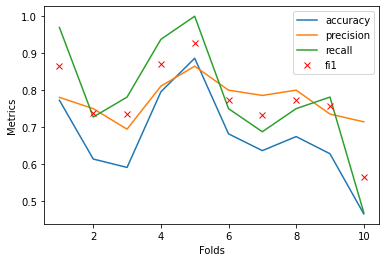

In [169]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.7727272727272727, 0.6136363636363636, 0.5909090909090909, 0.7954545454545454, 0.8863636363636364, 0.6818181818181818, 0.6363636363636364, 0.6744186046511628, 0.627906976744186, 0.46511627906976744], label='accuracy')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.7804878048780488, 0.75, 0.6944444444444444, 0.8108108108108109, 0.8648648648648649, 0.8, 0.7857142857142857, 0.8, 0.7352941176470589, 0.7142857142857143] , label='precision')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.9696969696969697, 0.7272727272727273, 0.78125, 0.9375, 1.0, 0.75, 0.6875, 0.75, 0.78125, 0.46875], label='recall')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.8648648648648648, 0.7384615384615384, 0.7352941176470588, 0.8695652173913043, 0.927536231884058, 0.7741935483870969, 0.7333333333333334, 0.7741935483870969, 0.7575757575757576, 0.5660377358490566], 'rx', label='fi1')        
plt.xlabel("Folds")
plt.ylabel("Metrics")
plt.legend()



Again, the mean precision, recall and F1 score are relatively high, with low standard deviation. The mean accuracy is lower than the naïve majority class classifier. It is unclear from this investigation whether this an anomaly or if it is indicating that generalizability may not be as good as suggested by regular k-fold cross-validation.

I visualized the stratified k-fold approach, and can see that it is selecting non-contiguous data in order to generate partitions with balanced class counts.

<AxesSubplot:title={'center':'StratifiedKFold'}, xlabel='Sample index', ylabel='CV iteration'>

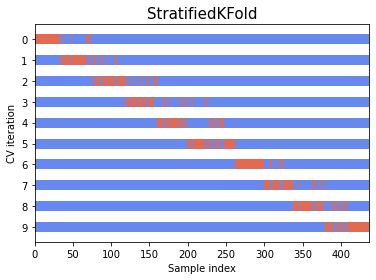

In [155]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Formatting
    yticklabels = list(range(n_splits)) 
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2], xlim=[0, 437])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
plot_cv_indices(skf, X_BOW_OF, y, ax, 10)

Overall, the best SVM classifier was the original model (SVM_BOW_OF). It had the following performance metrics: 82.6% accuracy, 87.5% precision, 87.4% recall, 58% specificity and F1 score of 0.8878. Running k-fold cross validation on this model supports the model generalizing well, though the stratified k-fold cross-validation was a little less strong and could be an area to investigate further.

## 3. Refining the TensorFlow Model

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

I had chosen to further refine the model TF_OF, which trains only on the Other Features set. This appeared to converge and had validation accuracy of 82.76%. This model had two hidden layers, each with 24 nodes, 20 epochs, and validation split of 0.33.

### 3.1. Model TF_A

I first increased the number of epochs to 30 to see if the learning would continue to improve.

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 18s 63ms/sample - loss: 0.7100 - acc: 0.3767 - val_loss: 0.6914 - val_acc: 0.5931
Epoch 2/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.6706 - acc: 0.6986 - val_loss: 0.6604 - val_acc: 0.7448
Epoch 3/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.6393 - acc: 0.7534 - val_loss: 0.6348 - val_acc: 0.7310
Epoch 4/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.6140 - acc: 0.7466 - val_loss: 0.6107 - val_acc: 0.7310
Epoch 5/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.5917 - acc: 0.7432 - val_loss: 0.5892 - val_acc: 0.7241
Epoch 6/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.5718 - acc: 0.7432 - val_loss: 0.5695 - val_acc: 0.7241
Epoch 7/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.5543 - acc: 0.7432 - val_loss: 0.5540 - val_acc: 0.7241
Epoch 8/

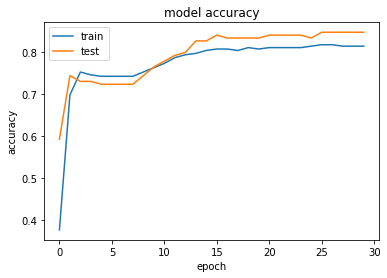

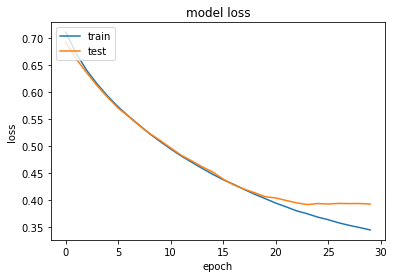

In [35]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=30)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

There is a small improvement in accuracy. I decided to use 30 epochs for the subsequent investigations.

### 3.2. Model TF_B

I then increased the hidden layer capacity to 64 on both hidden layers to see if increased capacity would improve the model's performance.

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 13s 45ms/sample - loss: 0.6452 - acc: 0.6952 - val_loss: 0.5918 - val_acc: 0.7241
Epoch 2/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.5784 - acc: 0.7432 - val_loss: 0.5585 - val_acc: 0.7241
Epoch 3/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.5480 - acc: 0.7432 - val_loss: 0.5379 - val_acc: 0.7241
Epoch 4/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.5218 - acc: 0.7432 - val_loss: 0.5197 - val_acc: 0.7241
Epoch 5/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.5028 - acc: 0.7432 - val_loss: 0.5025 - val_acc: 0.7241
Epoch 6/30
292/292 [==============================] - 3s 12ms/sample - loss: 0.4824 - acc: 0.7432 - val_loss: 0.4828 - val_acc: 0.7241
Epoch 7/30
292/292 [==============================] - 3s 12ms/sample - loss: 0.4663 - acc: 0.7568 - val_loss: 0.4656 - val_acc: 0.7586
Epoch 8/

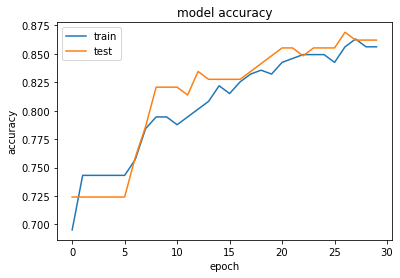

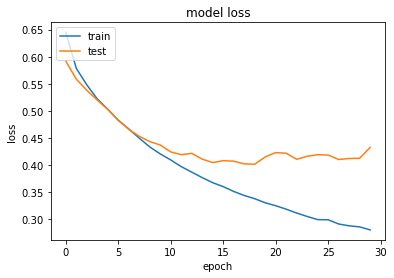

In [42]:
# define and fit the model
model = Sequential()
model.add(Dense(64, input_dim=52, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=30)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This achieved slightly better accuracy, but test loss plateaus after 10 epochs. This comparable to the base model but not clearly better. 

### 3.3. Model TF_C

I decided to increase the hidden layer capacity even further, to 128/64 nodes per layer.

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 11s 39ms/sample - loss: 0.6837 - acc: 0.5514 - val_loss: 0.6239 - val_acc: 0.7241
Epoch 2/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.5723 - acc: 0.7432 - val_loss: 0.5704 - val_acc: 0.7241
Epoch 3/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.5294 - acc: 0.7432 - val_loss: 0.5431 - val_acc: 0.7241
Epoch 4/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.4993 - acc: 0.7432 - val_loss: 0.5130 - val_acc: 0.7241
Epoch 5/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.4694 - acc: 0.7466 - val_loss: 0.4789 - val_acc: 0.7379
Epoch 6/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.4418 - acc: 0.7808 - val_loss: 0.4511 - val_acc: 0.8207
Epoch 7/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.4181 - acc: 0.7911 - val_loss: 0.4260 - val_acc: 0.8207
Epoch 8/

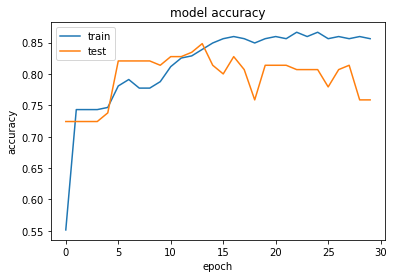

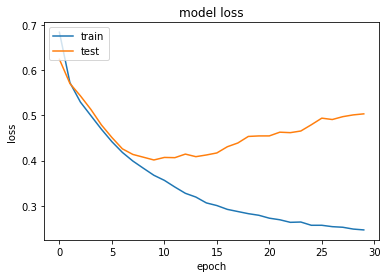

In [43]:
# define and fit the model
model = Sequential()
model.add(Dense(128, input_dim=52, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=30)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This capacity is too high as there is overfitting.

### 3.4. Model TF_D

My previous investigations used two hidden layers, so I decided to try reducing capacity to one hidden layer with 128 nodes.

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 12s 42ms/sample - loss: 0.6459 - acc: 0.7295 - val_loss: 0.6237 - val_acc: 0.7241
Epoch 2/30
292/292 [==============================] - 3s 11ms/sample - loss: 0.5986 - acc: 0.7397 - val_loss: 0.5920 - val_acc: 0.7241
Epoch 3/30
292/292 [==============================] - 3s 12ms/sample - loss: 0.5645 - acc: 0.7432 - val_loss: 0.5669 - val_acc: 0.7241
Epoch 4/30
292/292 [==============================] - 3s 12ms/sample - loss: 0.5389 - acc: 0.7432 - val_loss: 0.5449 - val_acc: 0.7241
Epoch 5/30
292/292 [==============================] - 3s 12ms/sample - loss: 0.5184 - acc: 0.7432 - val_loss: 0.5275 - val_acc: 0.7241
Epoch 6/30
292/292 [==============================] - 3s 12ms/sample - loss: 0.5007 - acc: 0.7432 - val_loss: 0.5106 - val_acc: 0.7241
Epoch 7/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.4861 - acc: 0.7432 - val_loss: 0.4962 - val_acc: 0.7172
Epoch 8/

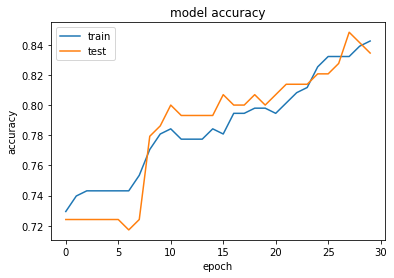

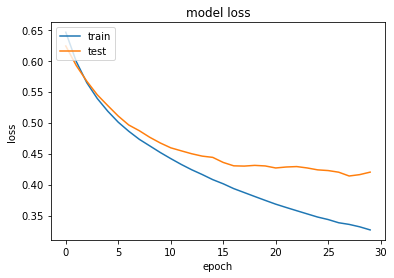

In [44]:
# define and fit the model
model = Sequential()
model.add(Dense(128, input_dim=52, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=30)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This has similar performance to the base model but is not clearly better, with the test loss plateauing above the training loss after 10 epochs.

After these investigations I decided to use the TF-OF_A for further investigations. This is the original model trained for 30 epochs.

### 3.5. Model TF_E

Next I tried varying the batch size, first using the batch size of 1 (stochastic batch). 

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 13s 45ms/sample - loss: 0.5572 - acc: 0.7363 - val_loss: 0.4721 - val_acc: 0.7793
Epoch 2/30
292/292 [==============================] - 5s 15ms/sample - loss: 0.4508 - acc: 0.7740 - val_loss: 0.4173 - val_acc: 0.8276
Epoch 3/30
292/292 [==============================] - 4s 15ms/sample - loss: 0.4080 - acc: 0.7808 - val_loss: 0.3962 - val_acc: 0.8345
Epoch 4/30
292/292 [==============================] - 5s 16ms/sample - loss: 0.3749 - acc: 0.7979 - val_loss: 0.3937 - val_acc: 0.8276
Epoch 5/30
292/292 [==============================] - 5s 18ms/sample - loss: 0.3503 - acc: 0.8253 - val_loss: 0.3977 - val_acc: 0.8276
Epoch 6/30
292/292 [==============================] - 6s 20ms/sample - loss: 0.3345 - acc: 0.8356 - val_loss: 0.4196 - val_acc: 0.8276
Epoch 7/30
292/292 [==============================] - 5s 16ms/sample - loss: 0.3147 - acc: 0.8322 - val_loss: 0.4500 - val_acc: 0.8552
Epoch 8/

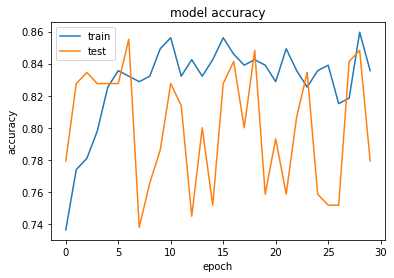

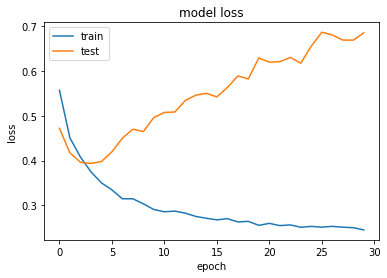

In [45]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, batch_size=1, epochs=30)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This degraded performance as test accuracy was unstable and test loss regressed.

### 3.6. Model TF_F

Next I tried full batch size (292 is 67% of 437).

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 12s 42ms/sample - loss: 0.7160 - acc: 0.3425 - val_loss: 0.7103 - val_acc: 0.3586
Epoch 2/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.7108 - acc: 0.3904 - val_loss: 0.7061 - val_acc: 0.4552
Epoch 3/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.7057 - acc: 0.4075 - val_loss: 0.7021 - val_acc: 0.4552
Epoch 4/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.7009 - acc: 0.4658 - val_loss: 0.6982 - val_acc: 0.4966
Epoch 5/30
292/292 [==============================] - 4s 12ms/sample - loss: 0.6962 - acc: 0.4760 - val_loss: 0.6945 - val_acc: 0.4759
Epoch 6/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.6917 - acc: 0.4897 - val_loss: 0.6909 - val_acc: 0.5103
Epoch 7/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.6873 - acc: 0.5171 - val_loss: 0.6874 - val_acc: 0.5793
Epoch 8/

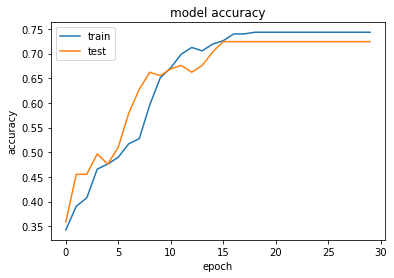

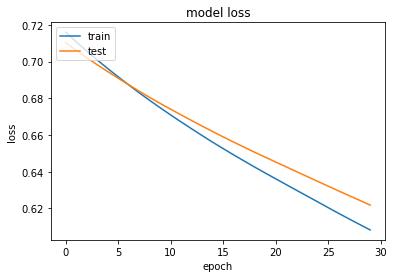

In [46]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, batch_size=292, epochs=30)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This causes accuracy to worsen and plateau after 15 epochs.

### 3.7. Model TF_G

Next I tried the batch size of 128 which was approximately in the middle of the previous two batch sizes.

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 13s 44ms/sample - loss: 0.7447 - acc: 0.3014 - val_loss: 0.7184 - val_acc: 0.4345
Epoch 2/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.7231 - acc: 0.4110 - val_loss: 0.6998 - val_acc: 0.4483
Epoch 3/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.7035 - acc: 0.4521 - val_loss: 0.6830 - val_acc: 0.5724
Epoch 4/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.6863 - acc: 0.5616 - val_loss: 0.6677 - val_acc: 0.6690
Epoch 5/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.6710 - acc: 0.6062 - val_loss: 0.6539 - val_acc: 0.6828
Epoch 6/30
292/292 [==============================] - 4s 13ms/sample - loss: 0.6559 - acc: 0.6678 - val_loss: 0.6416 - val_acc: 0.7103
Epoch 7/30
292/292 [==============================] - 4s 14ms/sample - loss: 0.6426 - acc: 0.7158 - val_loss: 0.6306 - val_acc: 0.7172
Epoch 8/

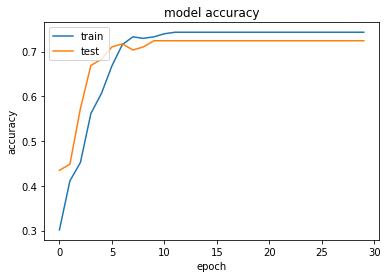

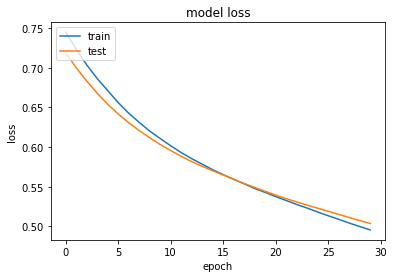

In [47]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, batch_size=128, epochs=30)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Accuracy is still worse than the base model which uses the default batch size of 32.

### 3.8. Grid Search

For further fine tuning I ran a grid search to see if the best combination of parameters so far could be further improved. I tried a few different optimizers and a slightly longer number of epochs. For the batch size I explored values close to 32 to see if fine-tuning would improve performance.

In [50]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=52, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])
    return model

# create model
model = KerasClassifier(build_fn=create_model)

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# grid search epochs, batch size and optimizer
optimizers = ['adam', 'sgd', 'adagrad']
inits = ['uniform', 'normal']
epochs = [30, 50]
batches = [24, 32, 48]

# Checkpointing
checkpoint = ModelCheckpoint("bestmodel_dailvote.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
callbacks_list = [checkpoint]

param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_OF, y, validation_split=0.33, verbose=1, callbacks=callbacks_list)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Train on 233 samples, validate on 116 samples
Epoch 1/30
 24/233 [==>...........................] - ETA: 1:05 - loss: 0.6858 - acc: 0.5417
Epoch 00001: acc improved from -inf to 0.61803, saving model to bestmodel_dailvote.hdf5
233/233 [==============================] - 14s 58ms/sample - loss: 0.6793 - acc: 0.6180 - val_loss: 0.6591 - val_acc: 0.7586
Epoch 2/30
 24/233 [==>...........................] - ETA: 0s - loss: 0.6599 - acc: 0.7500
Epoch 00002: acc improved from 0.61803 to 0.75107, saving model to bestmodel_dailvote.hdf5
233/233 [==============================] - 4s 15ms/sample - loss: 0.6486 - acc: 0.7511 - val_loss: 0.6312 - val_acc: 0.7328
Epoch 3/30
 24/233 [==>...........................] - ETA: 0s - loss: 0.6262 - acc: 0.8333
Epoch 00003: acc did not improve from 0.75107
233/233 [==============================] - 4s 16ms/sample - loss: 0.6197 - acc: 0.7339 - val_loss: 0.6072 - val_acc: 0.6897
Epoch 4/30
 24/233 [==>...........................] - ETA: 0s - loss: 0.6646 - ac

The grid search found that the best result was the original model with batch size of 48.

### 3.9. Model TF_A_GS

I ran the model identified by the grid search.

Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 1s 2ms/sample - loss: 0.6998 - acc: 0.4623 - val_loss: 0.6944 - val_acc: 0.5172
Epoch 2/30
292/292 [==============================] - 0s 137us/sample - loss: 0.6721 - acc: 0.6747 - val_loss: 0.6719 - val_acc: 0.7103
Epoch 3/30
292/292 [==============================] - 0s 144us/sample - loss: 0.6509 - acc: 0.7466 - val_loss: 0.6535 - val_acc: 0.7241
Epoch 4/30
292/292 [==============================] - 0s 161us/sample - loss: 0.6319 - acc: 0.7432 - val_loss: 0.6369 - val_acc: 0.7241
Epoch 5/30
292/292 [==============================] - 0s 161us/sample - loss: 0.6158 - acc: 0.7432 - val_loss: 0.6225 - val_acc: 0.7241
Epoch 6/30
292/292 [==============================] - 0s 150us/sample - loss: 0.6015 - acc: 0.7432 - val_loss: 0.6084 - val_acc: 0.7241
Epoch 7/30
292/292 [==============================] - 0s 143us/sample - loss: 0.5869 - acc: 0.7432 - val_loss: 0.5939 - val_acc: 0.7241
Epoc

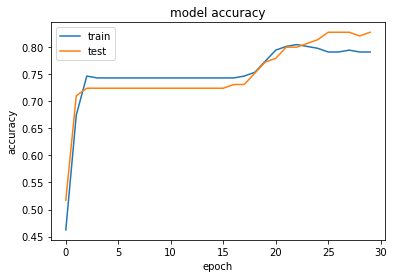

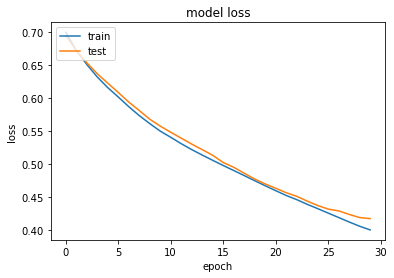

In [35]:
# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=30, batch_size=48)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The accuracy is similar to the results from initial investigation, and train and test loss are close to each other.

### 3.10. Model TF_A_GS_BIAS

The TensorFlow documentation provides several suggestions on how to improve performance when working with imbalanced datasets. Here, I tried introducing an initial bias based on the relative class sizes. This should improve performance in the early stages of training as initial predictions will more closely reflect the relative class frequencies.

In [75]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 437
    Positive: 322 (73.68% of total)



In [76]:
initial_bias = np.log([pos/neg])
print(initial_bias)


[1.02961942]


Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 0s 2ms/sample - loss: 0.5761 - acc: 0.7432 - val_loss: 0.5912 - val_acc: 0.7241
Epoch 2/30
292/292 [==============================] - 0s 188us/sample - loss: 0.5669 - acc: 0.7432 - val_loss: 0.5853 - val_acc: 0.7241
Epoch 3/30
292/292 [==============================] - 0s 232us/sample - loss: 0.5614 - acc: 0.7432 - val_loss: 0.5792 - val_acc: 0.7241
Epoch 4/30
292/292 [==============================] - 0s 137us/sample - loss: 0.5561 - acc: 0.7432 - val_loss: 0.5741 - val_acc: 0.7241
Epoch 5/30
292/292 [==============================] - 0s 202us/sample - loss: 0.5508 - acc: 0.7432 - val_loss: 0.5693 - val_acc: 0.7241
Epoch 6/30
292/292 [==============================] - 0s 141us/sample - loss: 0.5460 - acc: 0.7432 - val_loss: 0.5646 - val_acc: 0.7241
Epoch 7/30
292/292 [==============================] - ETA: 0s - loss: 0.4992 - acc: 0.791 - 0s 161us/sample - loss: 0.5417 - acc: 0.7432 - v

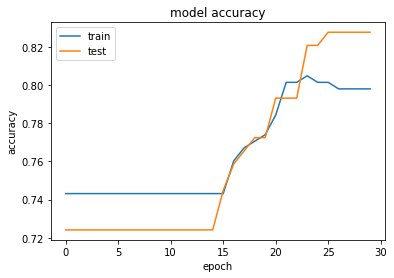

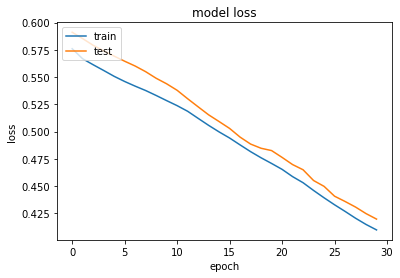

In [78]:
from tensorflow.keras.initializers import Constant

output_bias = tf.keras.initializers.Constant(initial_bias)

# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=30, batch_size=48)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This looks to have had the expected effect: the accuracy stated at the level of the naïve classifier, and after 15 epochs of training further improved from this point. The overall accuracy after the full training period was minimally impacted.

### 3.11. Model TF_A_GS_WEIGHTS

Another suggestion was to calculate and train a model with class weights so the classifier would make larger adjustments for the less frequently observed classes.

In [124]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.90
Weight for class 1: 0.68


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 292 samples, validate on 145 samples
Epoch 1/30
292/292 [==============================] - 7s 26ms/sample - loss: 0.7899 - acc: 0.7432 - val_loss: 0.7937 - val_acc: 0.7241
Epoch 2/30
292/292 [==============================] - 0s 704us/sample - loss: 0.7620 - acc: 0.7432 - val_loss: 0.7686 - val_acc: 0.7241
Epoch 3/30
292/292 [==============================] - 0s 212us/sample - loss: 0.7365 - acc: 0.7432 - val_loss: 0.7458 - val_acc: 0.7241
Epoch 4/30
292/292 [==============================] - 0s 391us/sample - loss: 0.7142 - acc: 0.7432 - val_loss: 0.7279 - val_acc: 0.7241
Epoch 5/30
292/292 [==============================] - 0s 340us/sample - loss: 0.6945 - acc: 0.7432 - val_loss: 0.7101 - val_acc: 0.7310
Epoch 6/30
292/292 [==============================] - 0s 395us/sample - loss: 0.6784 - acc: 0.7432 - val_loss: 0.6934 - val_acc: 0.7241
Epoch 7/30
292/292 [==============================] - 0s 229us/sample - loss: 0.6607 - ac

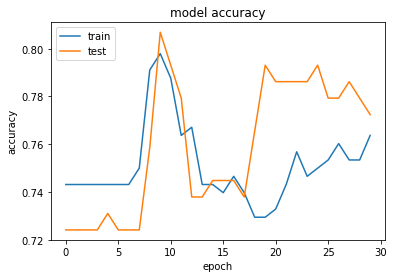

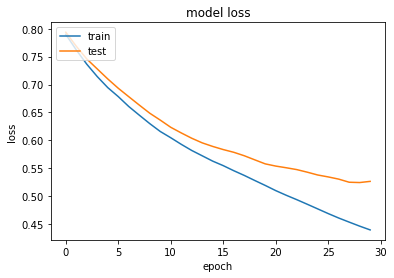

In [125]:
from tensorflow.keras.initializers import Constant

output_bias = tf.keras.initializers.Constant(initial_bias)

# define and fit the model
model = Sequential()
model.add(Dense(24, input_dim=52, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_OF, y, validation_split=0.33, epochs=30, batch_size=48, class_weight=class_weight)


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This did not help the model performance as the accuracy was more volatile and the final accuracy was lower.

### 3.12 Final Model Performance Evaluation (TF_A_GS_BIAS)

For the final model, I chose the base model, with 30 epochs, batch size of 48 and an initial bias. To evaluate its generalizability I also added dropout, gaussian noise, and max norm kernel constraints. I held out 15 percent of samples to form an evaluation set. I found that as these adjustments constrained the learning process, epochs needed to be increased to 50 for learning to complete.

In [170]:
X_OF_train, X_OF_eval, y_train, y_eval = train_test_split(X_OF, y, test_size=0.15)

Train on 248 samples, validate on 123 samples
Epoch 1/50
248/248 [==============================] - 2s 7ms/sample - loss: 0.5527 - acc: 0.7661 - prec: 0.7661 - rec: 1.0000 - val_loss: 0.6272 - val_acc: 0.6748 - val_prec: 0.6748 - val_rec: 1.0000
Epoch 2/50
248/248 [==============================] - 0s 209us/sample - loss: 0.5566 - acc: 0.7661 - prec: 0.7661 - rec: 1.0000 - val_loss: 0.6253 - val_acc: 0.6748 - val_prec: 0.6748 - val_rec: 1.0000
Epoch 3/50
248/248 [==============================] - 0s 265us/sample - loss: 0.5558 - acc: 0.7661 - prec: 0.7661 - rec: 1.0000 - val_loss: 0.6229 - val_acc: 0.6748 - val_prec: 0.6748 - val_rec: 1.0000
Epoch 4/50
248/248 [==============================] - 0s 298us/sample - loss: 0.5389 - acc: 0.7661 - prec: 0.7661 - rec: 1.0000 - val_loss: 0.6207 - val_acc: 0.6748 - val_prec: 0.6748 - val_rec: 1.0000
Epoch 5/50
248/248 [==============================] - 0s 233us/sample - loss: 0.5413 - acc: 0.7661 - prec: 0.7661 - rec: 1.0000 - val_loss: 0.6185 -

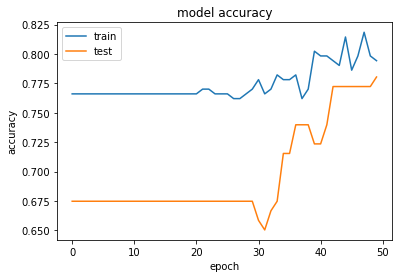

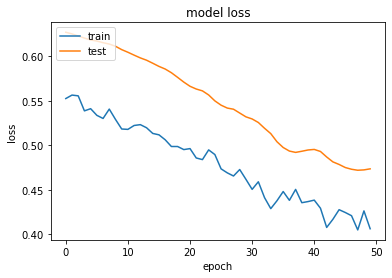

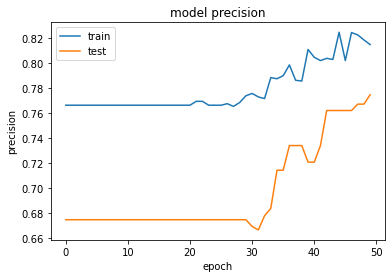

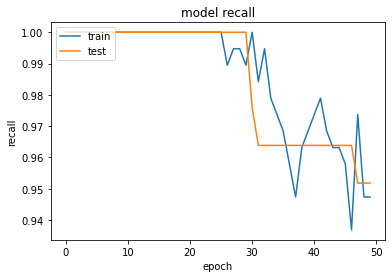

In [136]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import GaussianNoise

output_bias = tf.keras.initializers.Constant(initial_bias)

# define and fit the model
modelF = Sequential()
modelF.add(Dropout(0.2, input_shape=(52,)))
modelF.add(Dense(24, activation='relu', kernel_constraint=max_norm(3)))
modelF.add(Dropout(0.2))
modelF.add(GaussianNoise(0.1))
modelF.add(Dense(24, activation='relu', kernel_constraint=max_norm(3)))
modelF.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))


modelF.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', tf.keras.metrics.Precision(name='prec'), tf.keras.metrics.Recall(name='rec')])


history = modelF.fit(X_OF_train, y_train, validation_split=0.33, epochs=50, batch_size=48, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(history.history['prec'])
plt.plot(history.history['val_prec'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(history.history['rec'])
plt.plot(history.history['val_rec'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [160]:
f1 = 2*((0.8145*0.9474)/(0.8145+0.9474))

print("F1 Score: ", f1)

F1 Score:  0.8759376809126511


I saved the weights and the model.

In [137]:
modelF.save_weights("Model-Weights-Final.hdf5")

In [146]:
from tensorflow.keras.models import model_from_yaml

# define and fit the model
modelS = Sequential()
modelS.add(Dense(24, input_dim=52, activation='relu'))
modelS.add(Dense(24, activation='relu'))
modelS.add(Dense(1, activation='sigmoid'))

# Compile model
modelS.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# serialize model to YAML
model_yaml = modelS.to_yaml()
with open("Model_S.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

I then loaded the weights and the model, and added some additional metrics to evaluate for the final model.

In [150]:
# this opens the model
yaml_file = open('Model_S.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()

loaded_model = model_from_yaml(loaded_model_yaml)

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', tf.keras.metrics.Precision(name='prec'), tf.keras.metrics.Recall(name='rec')])

# load weights into new model
loaded_model.load_weights("Model-Weights-Final.hdf5")
print("Loaded model and weights from disk")


Loaded model and weights from disk


I then evaluated the model on the held out data.

In [159]:
result = loaded_model.evaluate(X_OF_eval, y_eval, verbose=1)
f1 = 2*((result[2]*result[3])/(result[2]+result[3]))
print("%s: %.2f%%" % (loaded_model.metrics_names[1], result[1]*100))
print("%s: %.2f%%" % (loaded_model.metrics_names[2], result[2]*100))
print("%s: %.2f%%" % (loaded_model.metrics_names[3], result[3]*100))
print("F1 Score: ", f1)

66/66 [==============================] - 2s 35ms/sample - loss: 0.4515 - acc: 0.7273 - prec: 0.7541 - rec: 0.9388
acc: 72.73%
prec: 75.41%
rec: 93.88%
F1 Score:  0.8363636136054993


###  TensorFlow Final Model Comparison Table 

| Metric/Algorithm | TF Model before Generalization | TF Model after Generalization | 
| :-:| --- | --- | 
|  acc  | 0.7944 | 0.7273 | 
|  loss | 0.4065 | 0.4515 | 
|  rec | 0.9474 | 0.9388 | 
|  prec | 0.8145 |  0.7541  |
|  f1 | 0.8759 |  0.8363  |


With generalization, the TensorFlow model has similar performance to a naive classifier. This suggests that it does not generalize as well as the SVM model. However it is hard to say for certain because the TensorFlow model performance is quite sensitive to the particular hyperparameters used, and the generalization process degrades the model with the aim of increasing generalizability. It is possible that in this case the effect of the degradation was too strong and a differently tuned model would outperform this one on unseen data.

## 4. Model Comparison

After comparing the tuned and generalized SVM and TensorFlow models, I would recommend that SVM be used for this dataset. While both SVM and TensorFlow had similar best accuracy scores before generalization, k-Fold cross-validation of the SVM model suggests that it generalizes reasonably well, whereas training a generalized TensorFlow model degraded the performance. SVM also consistently performed well with tweaks only having minor impact, whereas TensorFlow performance was quite sensitive to the particular parameters used. One reason SVM may be more robust for this learning task is because it was able to handle the full bag-of-words feature set, and its performance improved when these features were combined with the non-speech features. In contrast, the TensorFlow model was only able to achieve good performance when restricted to the non-speech features, which limits the data on which it could train.

## 5. Conclusion

In this project, I created a dataset using the Oireachtas Open Data APIs which was split into several feature set groups. I then developed SVM and TensorFlow models which both outperformed the naive majority class classifier. The SVM model that performed best used the text of the parliamentary speech transformed into a bag-of-words representation in combination with other non-speech contextual features. The TensorFlow model that performed best used only the non-speech features. After further model refinement and evaluation for generalization, I would recommend the SVM model for this task because it consistently provided a good result, was not sensitive to small tweaks, and benefited from using more of the assembled data set.

Some suggested future research in this field would be running the model on a larger dataset. One approach would be to follow the suggestion of Kornilova et al (2018) by using bootstrapping techniques on the existing DáilVote dataset to provide additional date. Another approach would be to expand the dataset beyond the scope of the 32nd Dáil which would provide more data, although this may bring further challenges due to changes in the membership, constituencies, and parties. 

This research would be of interest to Irish interest groups/lobbyists, as being able to predict an outcome of a particular vote based on particular features (such as content of speeches and metadata on members who voted) which they are invested in would help them to determine if they have made the right decision by focusing their efforts to supporting/opposing the bill. As the votes in the Dáil often take place some time after the debate that preceded them, they can predict the votes before they take place and be able to compare how the predictions fared.


## References

- scikit-learn (n.d.) <i> Cross-validation: evaluating estimator performance.</i> Available at: https://scikit-learn.org/stable/modules/cross_validation.html (Accessed: 8 May 2021).

- scikit-learn (n.d.) <i> Visualizing cross-validation behavior in scikit-learn.</i> Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html (Accessed: 8 May 2021).

- TensorFlow (n.d) <i>Classification on imbalanced data</i>. Available at: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data [Accessed: 17 April 2021).